In [1]:
!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import japanize_matplotlib

In [5]:
train_dfs = []
for i in range(47):
    num = str(i+1).zfill(2)
    train_dfs.append(pd.read_csv(num+".csv"))
train_df = pd.concat(train_dfs)
train_df.reset_index(drop=True, inplace=True)
test_df = pd.read_csv("test.csv")


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751560 entries, 0 to 751559
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            751560 non-null  int64  
 1   種類            751560 non-null  object 
 2   地域            0 non-null       float64
 3   市区町村コード       751560 non-null  int64  
 4   都道府県名         751560 non-null  object 
 5   市区町村名         751560 non-null  object 
 6   地区名           750890 non-null  object 
 7   最寄駅：名称        748788 non-null  object 
 8   最寄駅：距離（分）     728362 non-null  object 
 9   間取り           724050 non-null  object 
 10  面積（㎡）         751560 non-null  object 
 11  土地の形状         0 non-null       float64
 12  間口            0 non-null       float64
 13  延床面積（㎡）       0 non-null       float64
 14  建築年           729671 non-null  object 
 15  建物の構造         730717 non-null  object 
 16  用途            672943 non-null  object 
 17  今後の利用目的       384492 non-null  object 
 18  前面道路

In [7]:
l = len(train_df)
df = pd.concat([train_df,test_df])
df.drop(['地域','土地の形状','間口','延床面積（㎡）','前面道路：方位','前面道路：種類','前面道路：幅員（ｍ）'], inplace=True,axis=1)
train_df = df[:l]
test_df = df[l:]
test_df.head()

,ID,種類,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,...,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
0,1000057,中古マンション等,1101,北海道,札幌市中央区,大通西,大通,5,２ＬＤＫ,75,...,ＲＣ,NaN,住宅,商業地域,80.0,600.0,2022年第1四半期,改装済,NaN,NaN
1,1000077,中古マンション等,1101,北海道,札幌市中央区,大通西,西１１丁目,1,３ＬＤＫ,75,...,ＲＣ,NaN,その他,商業地域,80.0,600.0,2022年第2四半期,未改装,NaN,NaN
2,1000081,中古マンション等,1101,北海道,札幌市中央区,大通西,西１１丁目,3,２ＬＤＫ,75,...,ＲＣ,NaN,住宅,商業地域,80.0,600.0,2022年第2四半期,未改装,NaN,NaN
3,1000128,中古マンション等,1101,北海道,札幌市中央区,大通西,西１８丁目,3,２ＬＤＫ,50,...,ＲＣ,NaN,住宅,商業地域,80.0,400.0,2022年第2四半期,改装済,NaN,NaN
4,1000129,中古マンション等,1101,北海道,札幌市中央区,大通西,西１８丁目,0,１Ｒ,20,...,ＳＲＣ,NaN,住宅,商業地域,80.0,400.0,2022年第2四半期,未改装,NaN,NaN


In [8]:
train_df.describe()

,ID,市区町村コード,建ぺい率（％）,容積率（％）,取引価格（総額）_log
count,7.515600e+05,751560.000000,726811.000000,726811.000000,751560.000000
mean,1.850737e+07,18525.018398,67.690528,302.820155,7.231624
std,9.562456e+06,9592.101003,10.415187,148.420827,0.356035
min,1.000007e+06,1101.000000,30.000000,50.000000,2.653213
25%,1.307699e+07,13107.000000,60.000000,200.000000,7.041393
50%,1.403367e+07,14104.000000,60.000000,200.000000,7.278754
75%,2.703655e+07,27114.000000,80.000000,400.000000,7.462398
max,4.703684e+07,47213.000000,80.000000,1300.000000,9.934498


(array([2.90000e+01, 9.00000e+00, 2.70000e+01, 3.30000e+02, 9.53000e+03,
        1.70191e+05, 5.39049e+05, 3.20630e+04, 3.20000e+02, 1.20000e+01]),
 array([2.65321251, 3.38134111, 4.1094697 , 4.8375983 , 5.56572689,
        6.29385548, 7.02198408, 7.75011267, 8.47824126, 9.20636986,
        9.93449845]),
 <a list of 10 Patch objects>)

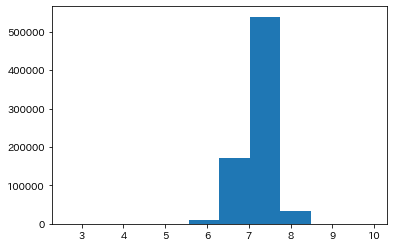

In [9]:

plt.hist(train_df["取引価格（総額）_log"])

In [10]:
l = len(train_df)
df = pd.concat([train_df,test_df])
df["面積（㎡）"] = df["面積（㎡）"].replace("2000㎡以上","2000")
df["面積（㎡）"] = df["面積（㎡）"].astype(int)
train_df = df[:l]
test_df = df[l:]

In [11]:
import warnings
warnings.simplefilter('ignore')

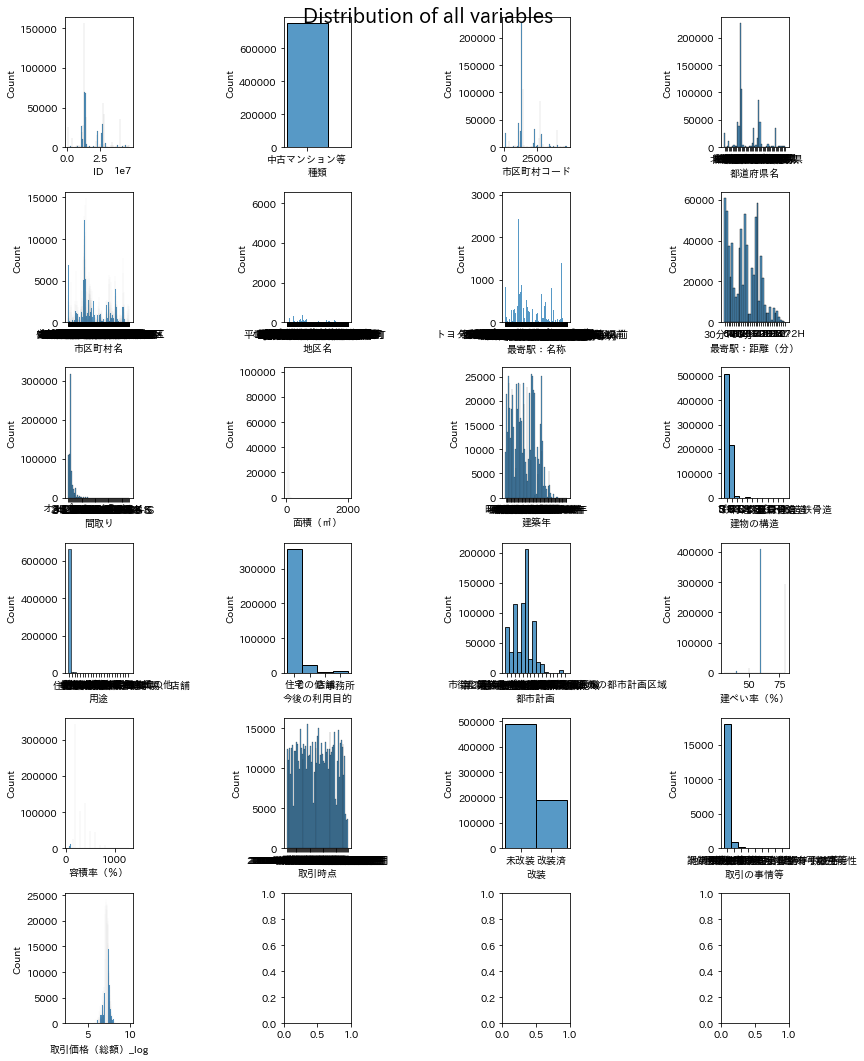

In [12]:
ncols = 4
nrows = np.ceil(len(train_df.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(train_df.columns, axs.flatten()):
    sns.histplot(train_df, x=c, ax=ax)
fig.suptitle('Distribution of all variables', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

In [13]:
numerical_feats = train_df.dtypes[train_df.dtypes != "object"].index
print("Numerical: ", len(numerical_feats))

categorical_feats = train_df.dtypes[train_df.dtypes == "object"].index
print("Categorical: ", len(categorical_feats))

Numerical:  6
Categorical:  15


In [14]:
print("Numerical:",numerical_feats)
print("Caetgorical:",categorical_feats)

Numerical: Index(['ID', '市区町村コード', '面積（㎡）', '建ぺい率（％）', '容積率（％）', '取引価格（総額）_log'], dtype='object')
Caetgorical: Index(['種類', '都道府県名', '市区町村名', '地区名', '最寄駅：名称', '最寄駅：距離（分）', '間取り', '建築年',
       '建物の構造', '用途', '今後の利用目的', '都市計画', '取引時点', '改装', '取引の事情等'],
      dtype='object')


In [15]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(14)

,Total,Percent
取引の事情等,732408,0.974517
今後の利用目的,367068,0.488408
用途,78617,0.104605
改装,72143,0.095991
間取り,27510,0.036604
容積率（％）,24749,0.032930
建ぺい率（％）,24749,0.032930
最寄駅：距離（分）,23198,0.030866
建築年,21889,0.029125
建物の構造,20843,0.027733


In [16]:
cols_fillna = ["今後の利用目的","改装","間取り","都市計画",'建物の構造']
for col in cols_fillna:
        train_df[col].fillna('None',inplace=True)
        test_df[col].fillna('None',inplace=True)

In [17]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(14)

,Total,Percent
取引の事情等,732408,0.974517
用途,78617,0.104605
容積率（％）,24749,0.032930
建ぺい率（％）,24749,0.032930
最寄駅：距離（分）,23198,0.030866
建築年,21889,0.029125
最寄駅：名称,2772,0.003688
地区名,670,0.000891
改装,0,0.000000
取引時点,0,0.000000


In [18]:
l = len(train_df)
df = pd.concat([train_df,test_df])

df["最寄駅：距離（分）"].replace({"30分?60分":"45","1H?1H30":"75","2H?":"120",'1H30?2H':"105"},inplace = True)
df["最寄駅：距離（分）"] = df["最寄駅：距離（分）"].astype(float)

def convert_wareki_to_seireki(wareki):
    if wareki == wareki:
        if wareki == '戦前':
            wareki = '昭和20年'
        value = wareki[2:-1]
        if value == '元':
            value = 1
        else:
            value = int(value)
        if '昭和' in wareki:
            seireki = 1925+value
        elif '平成' in wareki:
            seireki = 1988+value
        elif '令和' in wareki:
            seireki = 2018+value
    else:
        seireki = wareki
    return seireki
df['建築年'] = df['建築年'].apply(lambda x: convert_wareki_to_seireki(x))

df['取引時点_何年前'] = df['取引時点'].apply(lambda x: 2021-int(x[:4]))
df.drop(['取引時点'], axis=1, inplace=True)

train_df = df[:l]
test_df = df[l:]

In [19]:
cols_fillna = ["建築年","容積率（％）","建ぺい率（％）","最寄駅：距離（分）"]
for col in cols_fillna:
    train_df[col].fillna(train_df[col].mean(), inplace=True)
    test_df[col].fillna(test_df[col].mean(), inplace=True)

In [20]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(14)

,Total,Percent
取引の事情等,732408,0.974517
用途,78617,0.104605
最寄駅：名称,2772,0.003688
地区名,670,0.000891
ID,0,0.000000
取引価格（総額）_log,0,0.000000
改装,0,0.000000
容積率（％）,0,0.000000
建ぺい率（％）,0,0.000000
都市計画,0,0.000000


In [21]:
train_df["e_最寄駅：距離（分）"] = np.log(train_df["最寄駅：距離（分）"] + 1)
test_df["e_最寄駅：距離（分）"] = np.log(test_df["最寄駅：距離（分）"] + 1)

In [22]:
train_df["e_面積（㎡）"] = np.log(train_df["面積（㎡）"] + 1)
test_df["e_面積（㎡）"] = np.log(test_df["面積（㎡）"] + 1)

In [23]:
cols = ["取引の事情等","用途",'e_最寄駅：距離（分）',"市区町村コード", '建物の構造','取引時点_何年前', '改装', '間取り', 'e_面積（㎡）','建築年','建ぺい率（％）', '容積率（％）']
train_X = train_df[cols]
train_Y = train_df['取引価格（総額）_log']
test_data = test_df[cols]

In [24]:
from sklearn.preprocessing import LabelEncoder
df = pd.concat([train_X,test_data])
cols = [ '建物の構造','改装', '間取り',"用途","取引の事情等"]
for col in cols:
    le = LabelEncoder()
    encoded = le.fit_transform(df[col].values)
    decoded = le.inverse_transform(encoded)
    df[col] = encoded

In [25]:
train_X = df[:l]
test = df[l:]

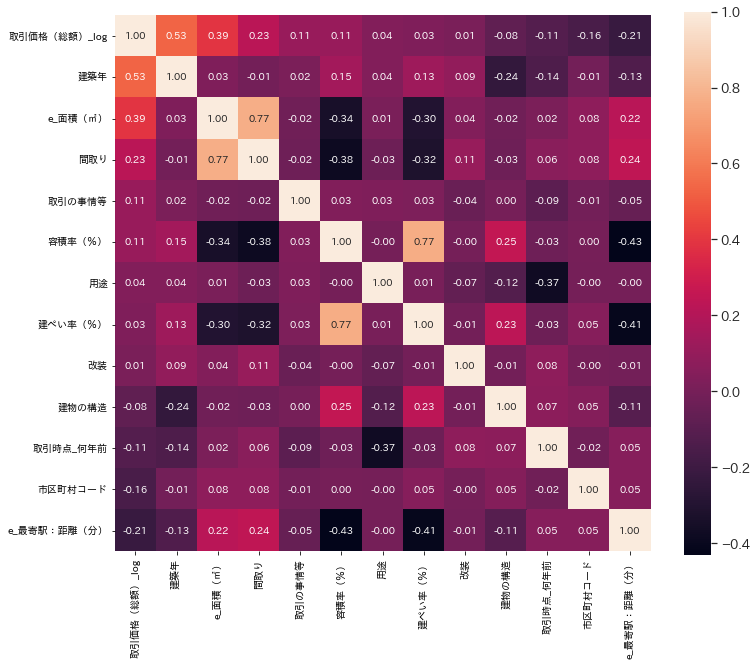

In [26]:
k = 15 # number of variables for heatmap
df = pd.concat([train_X,train_Y],axis=1)
corrmat = df.corr()
cols = corrmat.nlargest(k, '取引価格（総額）_log')['取引価格（総額）_log'].index
cm = np.corrcoef(df[cols].values.T)
fig, ax = plt.subplots(figsize=(12, 10))
sns.set(font_scale=1.2,font="IPAexGothic")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
fig.savefig("figure4.png")

In [27]:
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier
from catboost import Pool
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_absolute_error
import optuna

In [31]:
N_split = 2
kf = KFold(n_splits=N_split)
def objective(trial):
    params = {
        'objective': 'regression',
        'boosting_type': 'gbdt',
        'metric': 'mae',
        'learning_rate': trial.suggest_float("learning_rate", 0.04,0.4),
        'num_leaves': trial.suggest_int('num_leaves', 10, 1000),
        'colsample_bytree':trial.suggest_float("colsample", 0.1,0.3),
        'subsample': trial.suggest_float("subsample", 0.1,0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 100),
        'min_child_samples': trial.suggest_int('min_child_samples', 3, 2000),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'cat_smooth':trial.suggest_int('cat_smooth', 1, 100),
        'seed': 42,
        'n_estimators':20000
    }
            

    score_list = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(train_X, train_Y)):
        X_train = train_X.loc[train_idx][cols]
        X_valid = train_X.iloc[val_idx][cols]
        
       
        X_train_f = X_train
        Y_train = train_Y.loc[train_idx].values

        X_valid_f = X_valid
        Y_valid = train_Y.loc[val_idx].values


        model = lgb.LGBMRegressor(**params) 
        model.fit(        
                X_train_f,
                Y_train,
                eval_set =[( X_valid_f,Y_valid)],
                verbose =-1,
                early_stopping_rounds = 100)

        Y_valid_pred = model.predict(X_valid_f)
        score = mean_absolute_error(Y_valid, Y_valid_pred)
        score_list.append(score)
        
    return sum(score_list) / len(score_list)

try:
    cols = cols.drop('取引価格（総額）_log')
except:
    pass
lgb_study = optuna.create_study(direction='minimize')
lgb_study.optimize(objective, n_trials=50)
print(lgb_study.best_params)

[I 2023-02-23 07:15:44,616] A new study created in memory with name: no-name-e5946307-300b-462b-bb77-1bd422bb8442


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[141]	valid_0's l1: 0.197569
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[238]	valid_0's l1: 0.136038


[I 2023-02-23 07:16:51,740] Trial 0 finished with value: 0.16680343321694735 and parameters: {'learning_rate': 0.10574816718571123, 'num_leaves': 878, 'colsample': 0.19884667546636856, 'subsample': 0.20773821461612801, 'max_depth': 78, 'min_child_samples': 72, 'reg_alpha': 1.5440281298775022e-05, 'reg_lambda': 1.0969306459948165e-08, 'cat_smooth': 14}. Best is trial 0 with value: 0.16680343321694735.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[348]	valid_0's l1: 0.195454
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[450]	valid_0's l1: 0.130113


[I 2023-02-23 07:19:02,759] Trial 1 finished with value: 0.1627834608580954 and parameters: {'learning_rate': 0.04672611004127024, 'num_leaves': 513, 'colsample': 0.29077691040734455, 'subsample': 0.29384563792235596, 'max_depth': 94, 'min_child_samples': 543, 'reg_alpha': 0.23728227578684877, 'reg_lambda': 0.08329745725078654, 'cat_smooth': 25}. Best is trial 1 with value: 0.1627834608580954.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[136]	valid_0's l1: 0.197951
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[257]	valid_0's l1: 0.136228


[I 2023-02-23 07:19:46,802] Trial 2 finished with value: 0.16708982908987569 and parameters: {'learning_rate': 0.2803370954230326, 'num_leaves': 75, 'colsample': 0.24862386967083858, 'subsample': 0.23037140966350775, 'max_depth': 33, 'min_child_samples': 549, 'reg_alpha': 2.5428562232507923e-05, 'reg_lambda': 0.00033168448994542294, 'cat_smooth': 33}. Best is trial 1 with value: 0.1627834608580954.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[251]	valid_0's l1: 0.198327
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[155]	valid_0's l1: 0.136671


[I 2023-02-23 07:20:38,867] Trial 3 finished with value: 0.16749945423634727 and parameters: {'learning_rate': 0.2785617202014738, 'num_leaves': 862, 'colsample': 0.23728435687607943, 'subsample': 0.20732405056321776, 'max_depth': 28, 'min_child_samples': 858, 'reg_alpha': 0.10141614664338094, 'reg_lambda': 9.899431282060494e-08, 'cat_smooth': 64}. Best is trial 1 with value: 0.1627834608580954.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[141]	valid_0's l1: 0.198259
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[259]	valid_0's l1: 0.137618


[I 2023-02-23 07:21:36,333] Trial 4 finished with value: 0.16793816683731105 and parameters: {'learning_rate': 0.15422271554534855, 'num_leaves': 596, 'colsample': 0.17535456010439238, 'subsample': 0.1924610610191146, 'max_depth': 63, 'min_child_samples': 189, 'reg_alpha': 1.2787172340231356e-08, 'reg_lambda': 0.032287936716041146, 'cat_smooth': 47}. Best is trial 1 with value: 0.1627834608580954.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[88]	valid_0's l1: 0.19518
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[243]	valid_0's l1: 0.136308


[I 2023-02-23 07:22:07,512] Trial 5 finished with value: 0.1657440883215872 and parameters: {'learning_rate': 0.27012279080996116, 'num_leaves': 861, 'colsample': 0.19802409709355392, 'subsample': 0.17867612038830585, 'max_depth': 6, 'min_child_samples': 119, 'reg_alpha': 3.6765720693203257, 'reg_lambda': 3.4000780732869857e-07, 'cat_smooth': 79}. Best is trial 1 with value: 0.1627834608580954.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[136]	valid_0's l1: 0.197614
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[139]	valid_0's l1: 0.135893


[I 2023-02-23 07:22:36,916] Trial 6 finished with value: 0.16675330290011534 and parameters: {'learning_rate': 0.3317730527822752, 'num_leaves': 37, 'colsample': 0.23077044862869733, 'subsample': 0.15683042356175625, 'max_depth': 12, 'min_child_samples': 224, 'reg_alpha': 0.7060743689125408, 'reg_lambda': 2.3076263981732385e-07, 'cat_smooth': 14}. Best is trial 1 with value: 0.1627834608580954.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[330]	valid_0's l1: 0.201122
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[818]	valid_0's l1: 0.149502


[I 2023-02-23 07:23:51,093] Trial 7 finished with value: 0.17531201357939852 and parameters: {'learning_rate': 0.05036995282910612, 'num_leaves': 474, 'colsample': 0.10149374738514623, 'subsample': 0.18801370811123186, 'max_depth': 63, 'min_child_samples': 1989, 'reg_alpha': 8.591833672870678e-06, 'reg_lambda': 0.02469466501011773, 'cat_smooth': 47}. Best is trial 1 with value: 0.1627834608580954.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[151]	valid_0's l1: 0.199345
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[170]	valid_0's l1: 0.132706


[I 2023-02-23 07:24:35,886] Trial 8 finished with value: 0.1660252168917521 and parameters: {'learning_rate': 0.21992107830001115, 'num_leaves': 968, 'colsample': 0.2709847212283591, 'subsample': 0.13041617787693266, 'max_depth': 8, 'min_child_samples': 126, 'reg_alpha': 1.6990850357376787e-06, 'reg_lambda': 2.793305923508655e-08, 'cat_smooth': 54}. Best is trial 1 with value: 0.1627834608580954.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[114]	valid_0's l1: 0.19663
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[709]	valid_0's l1: 0.145446


[I 2023-02-23 07:26:08,100] Trial 9 finished with value: 0.17103769252732398 and parameters: {'learning_rate': 0.10200385653590949, 'num_leaves': 121, 'colsample': 0.19143982786539565, 'subsample': 0.15885377485954028, 'max_depth': 90, 'min_child_samples': 1873, 'reg_alpha': 0.001460520225296354, 'reg_lambda': 0.44919955171334364, 'cat_smooth': 7}. Best is trial 1 with value: 0.1627834608580954.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[199]	valid_0's l1: 0.200133
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[179]	valid_0's l1: 0.13166


[I 2023-02-23 07:27:12,417] Trial 10 finished with value: 0.16589644607281132 and parameters: {'learning_rate': 0.3945707082297403, 'num_leaves': 412, 'colsample': 0.2938027992970023, 'subsample': 0.29707945011419706, 'max_depth': 99, 'min_child_samples': 1363, 'reg_alpha': 0.016733719976441627, 'reg_lambda': 0.00015569801152381338, 'cat_smooth': 100}. Best is trial 1 with value: 0.1627834608580954.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[234]	valid_0's l1: 0.196974
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[263]	valid_0's l1: 0.130274


[I 2023-02-23 07:28:10,595] Trial 11 finished with value: 0.1636238736260423 and parameters: {'learning_rate': 0.1807694079203832, 'num_leaves': 686, 'colsample': 0.2897801396793608, 'subsample': 0.29130725812845565, 'max_depth': 41, 'min_child_samples': 610, 'reg_alpha': 9.256315835541631, 'reg_lambda': 8.386996340308435e-06, 'cat_smooth': 95}. Best is trial 1 with value: 0.1627834608580954.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[234]	valid_0's l1: 0.196182
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[216]	valid_0's l1: 0.130339


[I 2023-02-23 07:29:08,350] Trial 12 finished with value: 0.16326022974124182 and parameters: {'learning_rate': 0.1679760588561123, 'num_leaves': 638, 'colsample': 0.2980345267229799, 'subsample': 0.2928479652488344, 'max_depth': 42, 'min_child_samples': 713, 'reg_alpha': 6.941766670228142, 'reg_lambda': 8.580458852894627e-06, 'cat_smooth': 89}. Best is trial 1 with value: 0.1627834608580954.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[346]	valid_0's l1: 0.195246
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[506]	valid_0's l1: 0.129949


[I 2023-02-23 07:31:18,766] Trial 13 finished with value: 0.16259758543468988 and parameters: {'learning_rate': 0.061548742523259425, 'num_leaves': 328, 'colsample': 0.29897103818968646, 'subsample': 0.265588762010156, 'max_depth': 55, 'min_child_samples': 904, 'reg_alpha': 0.19497883320481266, 'reg_lambda': 8.908755967409941e-06, 'cat_smooth': 29}. Best is trial 13 with value: 0.16259758543468988.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[274]	valid_0's l1: 0.195576
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1236]	valid_0's l1: 0.129013


[I 2023-02-23 07:35:18,925] Trial 14 finished with value: 0.16229419500444592 and parameters: {'learning_rate': 0.06343383079480128, 'num_leaves': 269, 'colsample': 0.2623944116676998, 'subsample': 0.25984046223140284, 'max_depth': 77, 'min_child_samples': 1159, 'reg_alpha': 0.03793914831713595, 'reg_lambda': 0.0019773780875132073, 'cat_smooth': 28}. Best is trial 14 with value: 0.16229419500444592.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[80]	valid_0's l1: 0.19726
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1172]	valid_0's l1: 0.129114


[I 2023-02-23 07:38:48,183] Trial 15 finished with value: 0.1631869119234451 and parameters: {'learning_rate': 0.10855827031029458, 'num_leaves': 276, 'colsample': 0.26198328330600873, 'subsample': 0.2553446684325855, 'max_depth': 68, 'min_child_samples': 1214, 'reg_alpha': 0.012104340786875119, 'reg_lambda': 0.0008968098699649991, 'cat_smooth': 29}. Best is trial 14 with value: 0.16229419500444592.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[408]	valid_0's l1: 0.195078
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1857]	valid_0's l1: 0.13339


[I 2023-02-23 07:44:33,407] Trial 16 finished with value: 0.16423391431028894 and parameters: {'learning_rate': 0.04606216995912479, 'num_leaves': 244, 'colsample': 0.266642897045796, 'subsample': 0.25346784503060665, 'max_depth': 80, 'min_child_samples': 1504, 'reg_alpha': 0.0025015962683674156, 'reg_lambda': 0.0018360291652620546, 'cat_smooth': 1}. Best is trial 14 with value: 0.16229419500444592.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[164]	valid_0's l1: 0.197776
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[351]	valid_0's l1: 0.136186


[I 2023-02-23 07:45:31,898] Trial 17 finished with value: 0.16698107124543554 and parameters: {'learning_rate': 0.08347915893432364, 'num_leaves': 309, 'colsample': 0.23251575319515772, 'subsample': 0.2637317044255555, 'max_depth': 53, 'min_child_samples': 1091, 'reg_alpha': 0.0873561465822355, 'reg_lambda': 1.8622178577015424e-05, 'cat_smooth': 37}. Best is trial 14 with value: 0.16229419500444592.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[162]	valid_0's l1: 0.197549
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[673]	valid_0's l1: 0.133289


[I 2023-02-23 07:47:30,430] Trial 18 finished with value: 0.16541900020425931 and parameters: {'learning_rate': 0.1343034107207783, 'num_leaves': 202, 'colsample': 0.27487187271757246, 'subsample': 0.22991168401843237, 'max_depth': 79, 'min_child_samples': 1629, 'reg_alpha': 0.7672428514679793, 'reg_lambda': 0.005295651870944789, 'cat_smooth': 19}. Best is trial 14 with value: 0.16229419500444592.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[346]	valid_0's l1: 0.194853
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[543]	valid_0's l1: 0.129701


[I 2023-02-23 07:49:40,501] Trial 19 finished with value: 0.16227692710157385 and parameters: {'learning_rate': 0.07762486031380453, 'num_leaves': 159, 'colsample': 0.2535430029988181, 'subsample': 0.2311498688531951, 'max_depth': 52, 'min_child_samples': 915, 'reg_alpha': 0.025709947187020153, 'reg_lambda': 5.858724057169498e-05, 'cat_smooth': 65}. Best is trial 19 with value: 0.16227692710157385.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[141]	valid_0's l1: 0.197282
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[251]	valid_0's l1: 0.136296


[I 2023-02-23 07:50:28,099] Trial 20 finished with value: 0.1667893925634032 and parameters: {'learning_rate': 0.13163473566485406, 'num_leaves': 165, 'colsample': 0.22289325580759073, 'subsample': 0.10596375602054166, 'max_depth': 70, 'min_child_samples': 1140, 'reg_alpha': 0.0005077915045869901, 'reg_lambda': 0.00010870757958789847, 'cat_smooth': 72}. Best is trial 19 with value: 0.16227692710157385.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[234]	valid_0's l1: 0.195742
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[462]	valid_0's l1: 0.129825


[I 2023-02-23 07:52:20,232] Trial 21 finished with value: 0.1627831077969409 and parameters: {'learning_rate': 0.0731473588893136, 'num_leaves': 355, 'colsample': 0.25590298657400307, 'subsample': 0.23487485724203502, 'max_depth': 53, 'min_child_samples': 922, 'reg_alpha': 0.015036772917660908, 'reg_lambda': 2.9698647804771054e-05, 'cat_smooth': 57}. Best is trial 19 with value: 0.16227692710157385.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[162]	valid_0's l1: 0.196472
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[386]	valid_0's l1: 0.130393


[I 2023-02-23 07:53:49,062] Trial 22 finished with value: 0.1634323818645981 and parameters: {'learning_rate': 0.07668349408786207, 'num_leaves': 357, 'colsample': 0.27583488803992645, 'subsample': 0.2710463682119891, 'max_depth': 45, 'min_child_samples': 804, 'reg_alpha': 0.056422775227196006, 'reg_lambda': 1.329957188272054e-06, 'cat_smooth': 39}. Best is trial 19 with value: 0.16227692710157385.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[348]	valid_0's l1: 0.194745
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1273]	valid_0's l1: 0.129116


[I 2023-02-23 07:57:36,880] Trial 23 finished with value: 0.16193039446661345 and parameters: {'learning_rate': 0.04294248289124555, 'num_leaves': 176, 'colsample': 0.2802134733235037, 'subsample': 0.24452627505523727, 'max_depth': 57, 'min_child_samples': 1319, 'reg_alpha': 1.0468952339467341, 'reg_lambda': 5.307953882743973e-05, 'cat_smooth': 66}. Best is trial 23 with value: 0.16193039446661345.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[234]	valid_0's l1: 0.188345
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1089]	valid_0's l1: 0.130341


[I 2023-02-23 07:59:11,432] Trial 24 finished with value: 0.1593432919004833 and parameters: {'learning_rate': 0.0837251233300163, 'num_leaves': 14, 'colsample': 0.2519609974455761, 'subsample': 0.22023904500698124, 'max_depth': 26, 'min_child_samples': 1315, 'reg_alpha': 1.4091185689346732, 'reg_lambda': 0.00044544464786994164, 'cat_smooth': 68}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[120]	valid_0's l1: 0.196043
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[667]	valid_0's l1: 0.136965


[I 2023-02-23 08:00:27,506] Trial 25 finished with value: 0.16650435300892713 and parameters: {'learning_rate': 0.1000392649169726, 'num_leaves': 108, 'colsample': 0.24842895970297935, 'subsample': 0.21654936151642099, 'max_depth': 22, 'min_child_samples': 1375, 'reg_alpha': 1.4947976654051243, 'reg_lambda': 5.186733511128388e-05, 'cat_smooth': 71}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[94]	valid_0's l1: 0.18884
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1615]	valid_0's l1: 0.133757


[I 2023-02-23 08:02:19,673] Trial 26 finished with value: 0.161298460516131 and parameters: {'learning_rate': 0.13228793671349548, 'num_leaves': 11, 'colsample': 0.27911303396839976, 'subsample': 0.24075817040170208, 'max_depth': 19, 'min_child_samples': 1689, 'reg_alpha': 0.9503371489465099, 'reg_lambda': 0.00033299126964768725, 'cat_smooth': 82}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[532]	valid_0's l1: 0.189183
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1940]	valid_0's l1: 0.134861


[I 2023-02-23 08:05:25,007] Trial 27 finished with value: 0.16202202126449355 and parameters: {'learning_rate': 0.04360479281328219, 'num_leaves': 16, 'colsample': 0.2835345472698573, 'subsample': 0.2427636597839735, 'max_depth': 18, 'min_child_samples': 1711, 'reg_alpha': 1.6040415449989898, 'reg_lambda': 0.0005537884978137278, 'cat_smooth': 83}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[162]	valid_0's l1: 0.191758
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1050]	valid_0's l1: 0.135261


[I 2023-02-23 08:07:13,294] Trial 28 finished with value: 0.1635142407843037 and parameters: {'learning_rate': 0.13121651888855745, 'num_leaves': 28, 'colsample': 0.2786945999267142, 'subsample': 0.2214180169461447, 'max_depth': 33, 'min_child_samples': 1714, 'reg_alpha': 9.772862690815566, 'reg_lambda': 0.0002588293474429173, 'cat_smooth': 79}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[80]	valid_0's l1: 0.196294
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[679]	valid_0's l1: 0.13075


[I 2023-02-23 08:09:07,681] Trial 29 finished with value: 0.16352182858557354 and parameters: {'learning_rate': 0.10564368558141334, 'num_leaves': 189, 'colsample': 0.2820767546099095, 'subsample': 0.20119182330307625, 'max_depth': 16, 'min_child_samples': 1349, 'reg_alpha': 0.3334284032456181, 'reg_lambda': 0.005536826726589505, 'cat_smooth': 62}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[109]	valid_0's l1: 0.193733
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1392]	valid_0's l1: 0.133635


[I 2023-02-23 08:12:33,826] Trial 30 finished with value: 0.16368368295701702 and parameters: {'learning_rate': 0.08753927876080086, 'num_leaves': 93, 'colsample': 0.2677953102372455, 'subsample': 0.21493704421680962, 'max_depth': 23, 'min_child_samples': 1533, 'reg_alpha': 0.7590248759358328, 'reg_lambda': 0.0002024485595842708, 'cat_smooth': 71}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[381]	valid_0's l1: 0.191868
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[784]	valid_0's l1: 0.141253


[I 2023-02-23 08:14:30,827] Trial 31 finished with value: 0.16656083313946737 and parameters: {'learning_rate': 0.0484432953543177, 'num_leaves': 39, 'colsample': 0.2828878551593329, 'subsample': 0.24313389018630643, 'max_depth': 17, 'min_child_samples': 1788, 'reg_alpha': 2.0607133114984, 'reg_lambda': 0.0004846307478020567, 'cat_smooth': 82}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[442]	valid_0's l1: 0.190327
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1838]	valid_0's l1: 0.138089


[I 2023-02-23 08:16:34,441] Trial 32 finished with value: 0.16420794744547468 and parameters: {'learning_rate': 0.04154877237986836, 'num_leaves': 16, 'colsample': 0.28303981647958465, 'subsample': 0.24548479030679407, 'max_depth': 3, 'min_child_samples': 1541, 'reg_alpha': 1.9432865936829915, 'reg_lambda': 0.0007914988706473404, 'cat_smooth': 87}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[110]	valid_0's l1: 0.194078
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[950]	valid_0's l1: 0.129238


[I 2023-02-23 08:19:06,067] Trial 33 finished with value: 0.16165785517302259 and parameters: {'learning_rate': 0.06645068863980635, 'num_leaves': 105, 'colsample': 0.2974193154024551, 'subsample': 0.24263312301048226, 'max_depth': 35, 'min_child_samples': 1275, 'reg_alpha': 0.3573793556290102, 'reg_lambda': 0.00011703180153915243, 'cat_smooth': 75}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[80]	valid_0's l1: 0.195431
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[501]	valid_0's l1: 0.129331


[I 2023-02-23 08:20:27,037] Trial 34 finished with value: 0.16238119362429623 and parameters: {'learning_rate': 0.1178373029827175, 'num_leaves': 118, 'colsample': 0.2952319102829721, 'subsample': 0.2224847879061782, 'max_depth': 35, 'min_child_samples': 1262, 'reg_alpha': 0.29387384485634616, 'reg_lambda': 8.552076256849669e-05, 'cat_smooth': 75}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[162]	valid_0's l1: 0.197398
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1241]	valid_0's l1: 0.129288


[I 2023-02-23 08:24:11,242] Trial 35 finished with value: 0.16334301893340902 and parameters: {'learning_rate': 0.09153497581549541, 'num_leaves': 210, 'colsample': 0.299628143713748, 'subsample': 0.20966511482141859, 'max_depth': 29, 'min_child_samples': 1070, 'reg_alpha': 0.15922210360398156, 'reg_lambda': 0.00018270678221054442, 'cat_smooth': 66}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[164]	valid_0's l1: 0.195603
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1217]	valid_0's l1: 0.139223


[I 2023-02-23 08:26:22,252] Trial 36 finished with value: 0.16741300561925476 and parameters: {'learning_rate': 0.06842381371574, 'num_leaves': 79, 'colsample': 0.24511105344822925, 'subsample': 0.23162374679907544, 'max_depth': 38, 'min_child_samples': 1426, 'reg_alpha': 3.1123635810141836, 'reg_lambda': 2.6309909502954738e-06, 'cat_smooth': 58}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[80]	valid_0's l1: 0.195693
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1391]	valid_0's l1: 0.128843


[I 2023-02-23 08:30:04,503] Trial 37 finished with value: 0.16226819124046965 and parameters: {'learning_rate': 0.11923068543534107, 'num_leaves': 146, 'colsample': 0.2604413734358696, 'subsample': 0.20613713075508353, 'max_depth': 26, 'min_child_samples': 1270, 'reg_alpha': 0.42213583293756823, 'reg_lambda': 2.244113927962464e-05, 'cat_smooth': 92}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[156]	valid_0's l1: 0.197132
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[506]	valid_0's l1: 0.133052


[I 2023-02-23 08:31:43,830] Trial 38 finished with value: 0.16509207338904425 and parameters: {'learning_rate': 0.15126653154457576, 'num_leaves': 787, 'colsample': 0.27126020835504283, 'subsample': 0.276227276207594, 'max_depth': 60, 'min_child_samples': 1465, 'reg_alpha': 0.1196420177090788, 'reg_lambda': 6.376895029462304e-05, 'cat_smooth': 50}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[164]	valid_0's l1: 0.194889
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[579]	valid_0's l1: 0.136191


[I 2023-02-23 08:32:55,592] Trial 39 finished with value: 0.16553963119431978 and parameters: {'learning_rate': 0.06332004136861112, 'num_leaves': 62, 'colsample': 0.2420800258003954, 'subsample': 0.24198445370456337, 'max_depth': 45, 'min_child_samples': 992, 'reg_alpha': 0.5433878840776917, 'reg_lambda': 0.0002988381252927917, 'cat_smooth': 74}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[80]	valid_0's l1: 0.197012
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[242]	valid_0's l1: 0.141664


[I 2023-02-23 08:33:38,562] Trial 40 finished with value: 0.16933803946689208 and parameters: {'learning_rate': 0.09402003382187243, 'num_leaves': 516, 'colsample': 0.29059361722829896, 'subsample': 0.1945475639518572, 'max_depth': 30, 'min_child_samples': 1972, 'reg_alpha': 4.043500564580962, 'reg_lambda': 0.00203545016063392, 'cat_smooth': 78}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[444]	valid_0's l1: 0.188075
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[2012]	valid_0's l1: 0.135052


[I 2023-02-23 08:36:16,729] Trial 41 finished with value: 0.16156361639970668 and parameters: {'learning_rate': 0.05286929944396793, 'num_leaves': 11, 'colsample': 0.2850673936413972, 'subsample': 0.24898979610791663, 'max_depth': 16, 'min_child_samples': 1672, 'reg_alpha': 1.8377001742445103, 'reg_lambda': 0.00045838782985148043, 'cat_smooth': 84}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[234]	valid_0's l1: 0.193557
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1313]	valid_0's l1: 0.133695


[I 2023-02-23 08:39:28,562] Trial 42 finished with value: 0.1636258481071845 and parameters: {'learning_rate': 0.06068568926839374, 'num_leaves': 79, 'colsample': 0.27320071472127355, 'subsample': 0.2526472145645069, 'max_depth': 11, 'min_child_samples': 1630, 'reg_alpha': 1.0461669254957762, 'reg_lambda': 0.00012056393762149819, 'cat_smooth': 85}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[233]	valid_0's l1: 0.187712
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[646]	valid_0's l1: 0.140291


[I 2023-02-23 08:40:22,703] Trial 43 finished with value: 0.1640015009768463 and parameters: {'learning_rate': 0.08732214608837942, 'num_leaves': 10, 'colsample': 0.28949274676614484, 'subsample': 0.2480207889323446, 'max_depth': 22, 'min_child_samples': 1879, 'reg_alpha': 2.7173802418066506, 'reg_lambda': 0.0003889454360200501, 'cat_smooth': 97}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[110]	valid_0's l1: 0.195282
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1009]	valid_0's l1: 0.129359


[I 2023-02-23 08:42:29,680] Trial 44 finished with value: 0.16232015549290824 and parameters: {'learning_rate': 0.07349739739325742, 'num_leaves': 127, 'colsample': 0.2868896536646088, 'subsample': 0.22582156431756856, 'max_depth': 13, 'min_child_samples': 1297, 'reg_alpha': 9.447545707288151, 'reg_lambda': 0.0009302374741497433, 'cat_smooth': 66}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[465]	valid_0's l1: 0.192588
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1363]	valid_0's l1: 0.134467


[I 2023-02-23 08:45:31,451] Trial 45 finished with value: 0.16352787291158888 and parameters: {'learning_rate': 0.05634186910968471, 'num_leaves': 68, 'colsample': 0.25524616412006645, 'subsample': 0.23580829182636986, 'max_depth': 7, 'min_child_samples': 1609, 'reg_alpha': 0.24351727753681232, 'reg_lambda': 2.8727307670898756e-05, 'cat_smooth': 90}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[242]	valid_0's l1: 0.196562
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[242]	valid_0's l1: 0.142556


[I 2023-02-23 08:46:40,684] Trial 46 finished with value: 0.16955911955228142 and parameters: {'learning_rate': 0.10008691011966464, 'num_leaves': 214, 'colsample': 0.26779961124457036, 'subsample': 0.23754321438953502, 'max_depth': 34, 'min_child_samples': 1789, 'reg_alpha': 0.09050171594035605, 'reg_lambda': 0.00015018723189115412, 'cat_smooth': 79}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[410]	valid_0's l1: 0.195081
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[688]	valid_0's l1: 0.12967


[I 2023-02-23 08:49:07,384] Trial 47 finished with value: 0.1623755221464097 and parameters: {'learning_rate': 0.055594377420922936, 'num_leaves': 445, 'colsample': 0.2778699751921659, 'subsample': 0.2175572623831378, 'max_depth': 47, 'min_child_samples': 381, 'reg_alpha': 3.802528094759432, 'reg_lambda': 0.006269025973190737, 'cat_smooth': 61}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[348]	valid_0's l1: 0.194135
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1578]	valid_0's l1: 0.133583


[I 2023-02-23 08:53:39,084] Trial 48 finished with value: 0.1638588929287455 and parameters: {'learning_rate': 0.04169889573242881, 'num_leaves': 147, 'colsample': 0.29902365696966077, 'subsample': 0.27751182411029085, 'max_depth': 25, 'min_child_samples': 1413, 'reg_alpha': 0.5733751904736959, 'reg_lambda': 0.00027310493580889764, 'cat_smooth': 44}. Best is trial 24 with value: 0.1593432919004833.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[109]	valid_0's l1: 0.193253
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[683]	valid_0's l1: 0.12973


[I 2023-02-23 08:55:11,091] Trial 49 finished with value: 0.16149149020210576 and parameters: {'learning_rate': 0.08049577189315713, 'num_leaves': 55, 'colsample': 0.29097948024249304, 'subsample': 0.26180833476028403, 'max_depth': 38, 'min_child_samples': 1179, 'reg_alpha': 1.0305329192656145, 'reg_lambda': 5.216213075437172e-05, 'cat_smooth': 68}. Best is trial 24 with value: 0.1593432919004833.


{'learning_rate': 0.0837251233300163, 'num_leaves': 14, 'colsample': 0.2519609974455761, 'subsample': 0.22023904500698124, 'max_depth': 26, 'min_child_samples': 1315, 'reg_alpha': 1.4091185689346732, 'reg_lambda': 0.00044544464786994164, 'cat_smooth': 68}


In [32]:
lgb_best_params = lgb_study.best_params
add_params = {
        'objective':'regression', 
        'metric': 'mae', 
        'task': 'train', 
        'seed': 42,
        'n_estimators':20000
        }
lgb_best_params.update(add_params)

X_train, X_eval, Y_train, Y_eval = train_test_split(train_X, train_Y, test_size=0.2, random_state=0)
model_lgb = lgb.LGBMRegressor(**lgb_best_params) 
model_lgb.fit(        
        X_train,
        Y_train,
        eval_set =[( X_eval,Y_eval)],
        verbose =100,
        early_stopping_rounds = 100
)



Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l1: 0.113018
[200]	valid_0's l1: 0.105235
[300]	valid_0's l1: 0.101577
[400]	valid_0's l1: 0.099644
[500]	valid_0's l1: 0.0982813
[600]	valid_0's l1: 0.0971826
[700]	valid_0's l1: 0.0964475
[800]	valid_0's l1: 0.0958195
[900]	valid_0's l1: 0.095318
[1000]	valid_0's l1: 0.0948822
[1100]	valid_0's l1: 0.0945144
[1200]	valid_0's l1: 0.0941622
[1300]	valid_0's l1: 0.093882
[1400]	valid_0's l1: 0.0936191
[1500]	valid_0's l1: 0.0933948
[1600]	valid_0's l1: 0.0931739
[1700]	valid_0's l1: 0.0929672
[1800]	valid_0's l1: 0.0928075
[1900]	valid_0's l1: 0.0926632
[2000]	valid_0's l1: 0.0924846
[2100]	valid_0's l1: 0.0923342
[2200]	valid_0's l1: 0.0922213
[2300]	valid_0's l1: 0.0921135
[2400]	valid_0's l1: 0.091959
[2500]	valid_0's l1: 0.0918303
[2600]	valid_0's l1: 0.0917259
[2700]	valid_0's l1: 0.0915906
[2800]	valid_0's l1: 0.0914649
[2900]	valid_0's l1: 0.0913756
[3000]	valid_0's l1: 0.0912818
[3100]	valid_0's l1: 0.

LGBMRegressor(cat_smooth=68, colsample=0.2519609974455761,
              learning_rate=0.0837251233300163, max_depth=26, metric='mae',
              min_child_samples=1315, n_estimators=20000, num_leaves=14,
              objective='regression', reg_alpha=1.4091185689346732,
              reg_lambda=0.00044544464786994164, seed=42,
              subsample=0.22023904500698124, task='train')

In [33]:
N_split = 2
kf = KFold(n_splits=N_split)

def objective(trial):
   
    params = {
            'objective': 'reg:squarederror',
            'tree_method': 'hist',
            'grow_policy' : trial.suggest_categorical ('grow_policy', ['lossguide','depthwise']),
            'learning_rate':trial.suggest_loguniform('learning_rate', 0.01, 0.2),
            'max_depth': trial.suggest_int('max_depth', 3, 20),
            'reg_alpha': trial.suggest_loguniform('reg_alpha', 1, 10),
            'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-15, 10.0),
            'max_delta_step':trial.suggest_int('max_delta_step', 1, 10),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
            'colsample_bytree':trial.suggest_loguniform('colsample_bytree', 0.4, 1.0),
            'subsample': trial.suggest_loguniform('subsample', 0.4, 1.0),
            'seed':42
                }
    if params['grow_policy'] == 'lossguide':
        params['max_leaves'] = trial.suggest_int('max_leaves', 1, 100)   
        
        
    score_list = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(train_X, train_Y)):
        X_train = train_X.loc[train_idx][cols]
        X_valid = train_X.iloc[val_idx][cols]
        
       
        X_train_f = X_train
        Y_train = train_Y.loc[train_idx].values

        X_valid_f = X_valid
        Y_valid = train_Y.loc[val_idx].values


        model = xgb.XGBRegressor(**params) 
        model.fit(        
                X_train_f,
                Y_train,
                eval_set =[( X_valid_f,Y_valid)],
                verbose =0,
                early_stopping_rounds = 100)

        Y_valid_pred = model.predict(X_valid_f)
        score = mean_absolute_error(Y_valid, Y_valid_pred)
        score_list.append(score)
    return sum(score_list) / len(score_list)

try:
    cols = cols.drop('取引価格（総額）_log')
except:
    pass
xgb_study = optuna.create_study(direction='minimize')
xgb_study.optimize(objective, n_trials=50)
print(xgb_study.best_params)

[I 2023-02-23 09:07:59,291] A new study created in memory with name: no-name-8b5b058a-8131-4489-87e1-0e1691cd5055
[I 2023-02-23 09:08:26,587] Trial 0 finished with value: 3.222682758678462 and parameters: {'grow_policy': 'lossguide', 'learning_rate': 0.017545098754160104, 'max_depth': 12, 'reg_alpha': 2.0242666203226682, 'reg_lambda': 0.6711966148107298, 'max_delta_step': 2, 'min_child_weight': 60, 'colsample_bytree': 0.5973255374135359, 'subsample': 0.43245090636081107, 'max_leaves': 98}. Best is trial 0 with value: 3.222682758678462.
[I 2023-02-23 09:08:54,008] Trial 1 finished with value: 2.455235322046791 and parameters: {'grow_policy': 'depthwise', 'learning_rate': 0.02138284019623518, 'max_depth': 20, 'reg_alpha': 4.525762796993912, 'reg_lambda': 1.4871898933121561, 'max_delta_step': 2, 'min_child_weight': 248, 'colsample_bytree': 0.7566611692173605, 'subsample': 0.7563606057047738}. Best is trial 1 with value: 2.455235322046791.
[I 2023-02-23 09:09:33,248] Trial 2 finished with 

{'grow_policy': 'depthwise', 'learning_rate': 0.19900138825200483, 'max_depth': 16, 'reg_alpha': 5.093085195961041, 'reg_lambda': 0.19760304315719449, 'max_delta_step': 4, 'min_child_weight': 14, 'colsample_bytree': 0.4002083090352366, 'subsample': 0.5554661115167274}


In [34]:
xgb_best_params = xgb_study.best_params
add_params = {
        'objective': 'reg:squarederror',
        'seed':42,
        'n_estimators':20000
        }
xgb_best_params.update(add_params)

X_train, X_eval, Y_train, Y_eval = train_test_split(train_X, train_Y, test_size=0.2, random_state=0)
model_xgb = xgb.XGBRegressor(**xgb_best_params) 
model_xgb.fit(        
        X_train,
        Y_train,
        eval_set =[( X_eval,Y_eval)],
        verbose =100,
        early_stopping_rounds = 100
)



[0]	validation_0-rmse:5.94662
Will train until validation_0-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:0.141713
[200]	validation_0-rmse:0.136531
[300]	validation_0-rmse:0.135191
[400]	validation_0-rmse:0.134626
[500]	validation_0-rmse:0.134148
[600]	validation_0-rmse:0.133825
[700]	validation_0-rmse:0.133487
[800]	validation_0-rmse:0.13328
[900]	validation_0-rmse:0.133161
[1000]	validation_0-rmse:0.133067
[1100]	validation_0-rmse:0.132955
[1200]	validation_0-rmse:0.132839
[1300]	validation_0-rmse:0.132761
[1400]	validation_0-rmse:0.132676
[1500]	validation_0-rmse:0.132621
[1600]	validation_0-rmse:0.132575
[1700]	validation_0-rmse:0.132535
[1800]	validation_0-rmse:0.132521
[1900]	validation_0-rmse:0.1325
[2000]	validation_0-rmse:0.132451
[2100]	validation_0-rmse:0.132424
Stopping. Best iteration:
[2083]	validation_0-rmse:0.132411



XGBRegressor(colsample_bytree=0.4002083090352366, grow_policy='depthwise',
             learning_rate=0.19900138825200483, max_delta_step=4, max_depth=16,
             min_child_weight=14, n_estimators=20000,
             objective='reg:squarederror', reg_alpha=5.093085195961041,
             reg_lambda=0.19760304315719449, seed=42,
             subsample=0.5554661115167274)

In [35]:
N_split = 2
kf = KFold(n_splits=N_split)

import optuna

def objective(trial):
    params = {
                'iterations' : 10000,
                'eval_metric': "MAE", 
                'use_best_model': True,
                'random_seed' : 42,
                'learning_rate' :trial.suggest_loguniform('learning_rate', 0.01, 0.3),
                "depth": trial.suggest_int("depth", 1, 15),
                'l2_leaf_reg' :trial.suggest_loguniform('l2_leaf_reg', 1e-8, 20),
                'random_strength' : trial.suggest_loguniform('random_strength', 1, 50),
                'grow_policy':trial.suggest_categorical ('grow_policy', ['Lossguide','SymmetricTree']),
                'max_bin': trial.suggest_int("max_bin", 20, 500),
                'min_data_in_leaf':trial.suggest_int('min_data_in_leaf', 1, 100),
                "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli"])
            }
    
    if params['grow_policy'] == 'Lossguide':
        params['max_leaves']:trial.suggest_int('max_leaves', 1, 100)
    if params["bootstrap_type"] == "Bayesian":
        params["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif params["bootstrap_type"] == "Bernoulli":
        params["subsample"] = trial.suggest_float("subsample", 0.1, 1)
        
    score_list = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(train_X, train_Y)):
        X_train = train_X.loc[train_idx][cols]
        X_valid = train_X.iloc[val_idx][cols]
        
       
        X_train_f = X_train
        Y_train = train_Y.loc[train_idx].values

        X_valid_f = X_valid
        Y_valid = train_Y.loc[val_idx].values

        model = CatBoostRegressor(**params) 
        model.fit(        
                X_train_f,
                Y_train,
                eval_set =[( X_valid_f,Y_valid)],
                verbose =0,
                early_stopping_rounds = 100)

        Y_valid_pred = model.predict(X_valid_f)
        score = mean_absolute_error(Y_valid, Y_valid_pred)
        score_list.append(score)
    return sum(score_list) / len(score_list)

try:
    cols = cols.drop('取引価格（総額）_log')
except:
    pass
cat_study = optuna.create_study(direction='minimize')
cat_study.optimize(objective, n_trials=50)
print(cat_study.best_params)   
    

[I 2023-02-23 10:33:30,874] A new study created in memory with name: no-name-c9de7451-e4d2-410c-b4a2-b87fbe6b209e
[I 2023-02-23 10:35:11,175] Trial 0 finished with value: 0.16113438657192158 and parameters: {'learning_rate': 0.029609493754498138, 'depth': 2, 'l2_leaf_reg': 0.04266684502176806, 'random_strength': 3.0403786879938672, 'grow_policy': 'SymmetricTree', 'max_bin': 478, 'min_data_in_leaf': 83, 'bootstrap_type': 'Bernoulli', 'subsample': 0.738299981010807}. Best is trial 0 with value: 0.16113438657192158.
[I 2023-02-23 10:40:12,837] Trial 1 finished with value: 0.16085672690984065 and parameters: {'learning_rate': 0.018563366344460323, 'depth': 3, 'l2_leaf_reg': 4.8072337844118055e-06, 'random_strength': 4.231899423634257, 'grow_policy': 'SymmetricTree', 'max_bin': 497, 'min_data_in_leaf': 44, 'bootstrap_type': 'Bayesian', 'bagging_temperature': 7.0709860768508275}. Best is trial 1 with value: 0.16085672690984065.
[I 2023-02-23 10:42:00,111] Trial 2 finished with value: 0.21336

{'learning_rate': 0.08753341064976014, 'depth': 11, 'l2_leaf_reg': 1.9068048572740476e-06, 'random_strength': 18.765435183125554, 'grow_policy': 'SymmetricTree', 'max_bin': 383, 'min_data_in_leaf': 69, 'bootstrap_type': 'Bernoulli', 'subsample': 0.2557775026023472}


In [36]:
cat_best_params = cat_study.best_params
add_params = {
        'iterations' : 20000,
        'eval_metric': "MAE", 
        'use_best_model': True,
        'random_seed' : 42,
        }
cat_best_params.update(add_params)

X_train, X_eval, Y_train, Y_eval = train_test_split(train_X, train_Y, test_size=0.2, random_state=0)
model_cat = CatBoostRegressor(**cat_best_params) 
model_cat.fit(        
        X_train,
        Y_train,
        eval_set =[( X_eval,Y_eval)],
        verbose =100,
        early_stopping_rounds = 100
)


0:	learn: 0.2608564	test: 0.2609531	best: 0.2609531 (0)	total: 108ms	remaining: 35m 56s
100:	learn: 0.1209960	test: 0.1213812	best: 0.1213812 (100)	total: 12.5s	remaining: 41m 6s
200:	learn: 0.1082739	test: 0.1090483	best: 0.1090483 (200)	total: 25s	remaining: 41m 4s
300:	learn: 0.0981614	test: 0.0992607	best: 0.0992607 (300)	total: 37.9s	remaining: 41m 17s
400:	learn: 0.0937078	test: 0.0952989	best: 0.0952989 (400)	total: 50.9s	remaining: 41m 26s
500:	learn: 0.0910535	test: 0.0932002	best: 0.0932002 (500)	total: 1m 3s	remaining: 41m 21s
600:	learn: 0.0889354	test: 0.0916501	best: 0.0916501 (600)	total: 1m 16s	remaining: 41m 15s
700:	learn: 0.0871990	test: 0.0905065	best: 0.0905065 (700)	total: 1m 29s	remaining: 41m 12s
800:	learn: 0.0857446	test: 0.0896397	best: 0.0896397 (800)	total: 1m 42s	remaining: 41m 5s
900:	learn: 0.0844411	test: 0.0889124	best: 0.0889124 (900)	total: 1m 55s	remaining: 40m 58s
1000:	learn: 0.0833313	test: 0.0883960	best: 0.0883960 (1000)	total: 2m 9s	remaining:

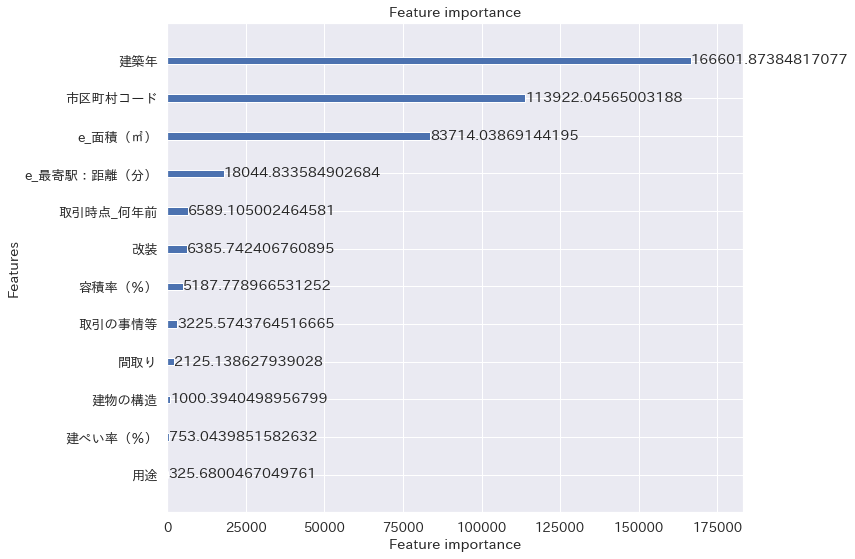

In [37]:
lgb.plot_importance(model_lgb, figsize=(12,8), max_num_features=50, importance_type='gain')
plt.tight_layout()
plt.show()
plt.close()

In [38]:
y_lgb_pred = model_lgb.predict(test)
y_xgb_pred = model_xgb.predict(test)
y_cat_pred = model_cat.predict(test)

In [39]:
sample = pd.read_csv("sample_submission.csv")
sample

,ID,取引価格（総額）_log
0,1000057,0
1,1000077,0
2,1000081,0
3,1000128,0
4,1000129,0
...,...,...
20529,47001654,0
20530,47001707,0
20531,47003198,0
20532,47005507,0


In [40]:
sample["取引価格（総額）_log"] = y_lgb_pred
sample.to_csv('/content/test_submissionLGB.csv',index = False)

In [41]:
sample["取引価格（総額）_log"] = y_xgb_pred
sample.to_csv('/content/test_submissionXGB.csv',index = False)

In [42]:
sample["取引価格（総額）_log"] = y_cat_pred
sample.to_csv('/content/test_submissionCAT.csv',index = False)